In [63]:
import numpy as np
import pandas as pd
from keras.losses import MSE
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, make_union
from sklearn.preprocessing import Normalizer, RobustScaler
from sklearn.tree import DecisionTreeRegressor
from tpot.builtins import StackingEstimator
from tpot.export_utils import set_param_recursive
from sklearn.metrics import mean_squared_error, r2_score
import os
print(os.getcwd())

C:\Users\sathy\OneDrive\Documents\GitHub\GenomicLQ\beta_prediction\tpot_runs


In [64]:
# NOTE: Make sure that the outcome column is labeled 'target' in the data file
# tpot_data = pd.read_csv('data/cclebeta.csv', index_col=0)
# features = tpot_data[['1825', '8204', '169834', '1294', '100128098', '56925', '5325', '1026', '4680', '56180', '84141', '11136', '256227', '10962', '4065', '3625', '23242', '23052', '56034', '162966', '91947', '22875', '10653', '6764', '79083', '5217', '4100', '195814', '3934', '8418', '100129196', '6549', '4145', '10866', '26577', '7103', '93273', '146713', '119395', '4660', '284361', '7699', '7739', '283352', '132430', '3883', '400940', '3859', '306', '11227', '3400', '29988', '948', '10252', '100127950', '83450', '255743', '9014', '643616', '388698', '9900', '6678', '200159', '50852', '100507178', '57787', '650794', '27342', '9615', '503693', '5816', '57732', '9240', '160857', '282775', '55286', '79822', '6566', '54737', '10170', '7045', '4885', '10459', '3488', '10265', '79836', '4646', '10287', '5172', '389932', '286530', '140886', '261734', '1734', '84692', '857', '53944', '339988', '7369', '10548', '118426', '9607', '1284', '84752', '639', '79365', '51806', '400566', '286827', '54751', '4311', '64208', '9696', '573', '65059', '151278', '150005', '79170', '65055', '7032', '59272', '9411', '79166', '79400', '151176', '164284', '148109', '30009', '55752', '7403', '285386', '374739', '5480', '100506530', '90141', '222962', '26538', '2593', '26164', '135152', '729', '27236', '10875', '401207', '55283', '256764', '55425', '8521', '100292680', '2294', '9223', '26103', '399670', '5913', '339803', '162494', '54545', '6558', '3977', '389289', '563', '729975', '8019', '2559', '732253', '2067', '799', '23464', '10656', '100653022', '9488', '5720', '116123', '4250', '136', '339976', '80185', '2737', '1832', '140686', '8828', '339535', '7031', '9369', '26136', '89792', '126661', '59286', '154790', '8975', '81706', '25961', '8125', '22873', '282980', '642636', '4781', '57459', '170712', '56999', '80759', '5987', '2890', '5342', '3636', '51146', '9692', '57619', '51010', '54807', '84342', '4633', '8518', '79784', '64782', '84167', '2516', '27302', '29117', '50840', '51450', '54457', '5324', '27101', '9966', '323', '283576', '57710', '6662', '8535', '1278', '28983', '285313', '9093', '84830', '84525', '54520', '22903', '57758', '1287', '81792', '5617', '284083', '51660', '100289678', '1345', '128817', '640', '91646', '28990', '7554', '8495', '256987', '5519', '51088', '634', '9245', '83468', '7903', '54842', '4938', '65983', '8655', '120224', '10391', '1545', '27147', '1060', '22828', '8386', '3875', '91543', '57643', '401387', '120114', '10682', '100129361', '127294', '164684', '63933', '84941', '163183', '128025', '768096', '54465', '6048', '3856', '132299', '7205', '9099', '399949', '590', '7766', '375484', '1795', '57150', '57379', '9652', '339874', '80144', '9961', '7345', '7070', '171177', '9885', '7039', '100128285', '597', '2312', '115106', '145173', '1434', '92292', '2180', '4804', '57622', '147746', '10884', '7341', '4905', '83887', '130560', '29761', '203414', '1462', '4628', '5054', '85509', '8837', '369', '100506049', '79776', '23180', '9768', '89765', '6457', '79993', '11315', '3363', '7840', '90139', '3781', '100131510', '54935', '27324', '100128927', '55698', '5649', '84900', '404201', '3817', '339210', '25996', '81696', '5573', '6422', '51406', '3120', '100129455', '1308', '65109', '114788', '10463', '4225', '10178', '55195', '55297', '79583', '2196', '27020', '51205', '9054', '128486', '64901', '80318', '3198', '54682', '400748', '2566', '4833', '84518', '203074', '57480', '118430', '100129387', '7762', '54915', '6947', '3767', '753', '9806', '10857', '25806', '55076', '79443', '4354', '285957', '117531', '250', '100129195', '10251', '3741', '55929', '7844', '6329', '9577', '493869', '140606', '10551', '84418', '79962', '26470', '2331', '3790', '389421', '10628', '85301', '100506731', '84557', '56659', '345778', '80274', '23040', '51141', '22829', '117581', '123041', '647946', '378828', '84140', '51181', '2742', '388394', '4199', '222194', '5937', '4604', '79027', '55236', '339366', '168507', '2203', '5293', '4246', '81627', '27243', '643677', '91612', '2245', '153643', '11259', '8477', '10403', '11068', '578', '6368', '1290', '728485', '23237', '100506542', '286006', '95681', '9754', '535', '55536', '11254', '27244', '84626', '200407', '55225', '6865', '54875', '2018', '8528', '57001', '100506119', '1803', '221830', '8506', '86', '255025', '50508', '27039', '79998', '570', '202333', '50848', '84152', '54510', '57501', '3552', '10140', '22996', '51058', '146849', '3216', '8360', '8504', '151242', '158293', '127943', '113540', '9353', '10499', '283651', '122786', '7515', '644128', '84300', '6160', '996', '51530', '3157', '645158', '6624', '1687', '27077', '6507', '3860', '118788', '646383', '100128782', '388951', '85016', '50862', '57110', '100505679', '154214', '84264', '4126', '100303728', '2821', '221091', '9135', '8480', '7832', '57169', '1015', '727916', '6502', '57610', '100507670', '283471', '51738', '3422', '57561', '3590', '64928', '400618', '6091', '4033', '84319', '54861', '27032', '3236', '8777', '22895', '10911', '1643', '926', '8675', '56995', '7755', '10010', '285220', '60370', '51351', '64433', '2065', '9037', '84186', '140738', '85236', '55350', '283078', '286122', '4092', '284353', '1577', '84099', '1087', '10409', '5592', '401588', '1293', '8000', '29114', '254863', '83544', '5082', '79659', '100133319', '5349', '222487', '7182', '340252', '5982', '8970', '51060', '26503', '6590', '9013', '339290', '283871', '79830', '84777', '23767', '24147', '1201', '60509', '55055', '92691', '57146', '121838', '6645', '9016', '4488', '84816', '2523', '3615', '84928', '399665', '240', '54716', '79152', '79006', '2673', '89797', '80776', '400709', '80032', '26298', '51233', '9212', '375444', '11031', '1282', '80223', '144406', '57016', '4016', '132660', '57126', '347240', '56941', '27076', '2799', '64759', '23116', '158158', '9521', '2644', '6167', '9722', '9940', '9585', '84944', '79949', '57003', '84278', '8844', '387751', '201477', '79633', '5646', '9294', '10345', '84766', '114795', '23232', '9757', '112942', '10300', '51362', '3713', '114783', '5671', '56938', '2583', '7350', '23474', '54926', '84216', '79825', '352954', '26222', '64108', '284119', '84958', '79183', '55068', '7696', '55268', '84171', '1048', '286', '2170', '2525', '10198', '84694', '10293', '7409', '1463', '51257', '1770', '10811', '3077', '4151', '54981', '140597', '4111', '90249', '8539', '115207', '2706', '339400', '57369', '27443', '9341', '1379', '5121', '27106', '79602', '81932', '200879', '50486', '10237', '5794', '1109', '57475', '79888', '6141', '140461', '400793', '166824', '91120', '100271840', '64843', '4486', '124976', '55802', '690', '51127', '78996', '6041', '8079', '57697', '7555', '6619', '55907', '25941', '9289', '148898', '8349', '222696', '23070', '5965', '84446', '3763', '4869', '9945', '22920', '285973', '84261', '63923', '100507057', '219972', '79940', '23613', '79990', '56548', '23566', '9053', '27122', '100131067', '55217', '8365', '132671', '10640', '30847', '1268', '169522', '126231', '341676', '5468', '6193', '653238', '133688', '124446', '374860', '7294', '7803', '201305', '389834', '57526', '133957', '113220', '266675', '81624', '3158', '4131', '10953', '4258', '100132708', '729085', '196993', '119710', '124093', '9808', '63926', '201514', '100507421', '93082', '6123', '10155', '64359', '10396', '58495', '80727', '100506606', '92421', '2299', '3329', '971', '1455', '3996', '56099', '8344', '64151', '374987', '22938', '3122', '114885', '55930', '9741', '255031', '3029', '54967', '2520', '1674', '6542', '285593', '91137', '130612', '6563', '59307', '2017', '6303', '55314', '5875', '6146', '80071', '4069', '81', '286046', '54360', '84503', '9514', '6439', '7167', '280665', '100130967', '203', '84726', '338323', '165904', '9997', '100126791', '10544', '164312', '283486', '23351', '84634', '5352', '338651', '51473', '55116', '729967']]
# training_features, testing_features, training_target, testing_target = train_test_split(features, tpot_data['Beta'].apply(lambda x:x*100), random_state=123)

In [65]:
tpot_data = pd.read_csv('../data/cclebeta.csv', index_col=0)
features = tpot_data[['8204', '25907', '23430', '4056', '23242', '4065', '6286', '5266', '100128098', '64208', '120224', '8292', '7103', '3856', '1179', '400965', '5172', '140886', '65055', '1510', '56034', '2350', '10085', '150005', '100505893', '5217', '9341', '389932', '399959', '27164', '221391', '1290', '1734', '80852', '64288', '23767', '643616', '26999', '80831', '100506542', '9750', '6273', '2559', '2891', '131920', '50852', '1795', '10656', '81792', '728613', '162540', '55752', '2181', '9615', '1825', '54674', '257313', '57045', '9014', '135644', '286190', '4255', '7045', '56659', '778', '4013', '92092', '169834', '171483', '8521', '6335', '6678', '93107', '100506639', '24147', '26065', '161931', '6019', '92421', '4072', '389813', '116123', '387755', '30009', '10782', '6591', '148189', '3449', '53826', '3171', '2203', '56925', '91653', '27077', '166824', '23461', '10551', '1284', '285613', '93517', '5420', '100132708', '7766', '55679', '9369', '55966', '4192', '5449', '135152', '5534', '10230', '100507267', '3400', '120114', '1006', '26136', '8526', '170575', '1991', '80071', '4680', '80201', '162681', '83450', '1026', '64854', '64793', '200916', '3049', '590', '4118', '93082', '646241', '388951', '126661', '100128071', '378832', '1545', '84232', '56180', '3315', '84223', '11118', '80759', '2890', '27134', '1416', '399665', '3069', '386758', '6947', '952', '55776', '4885', '8495', '100133319', '400793', '6549', '57498', '200159', '4069', '164284', '4071', '340533', '1009', '1294', '153684', '6871', '4600', '283742', '158471', '83887', '55425', '388021', '51282', '8536', '8518', '5202', '9656', '5617', '440498', '284119', '159195', '9229', '369', '136', '8383', '135295', '9754', '100129455', '9033', '10170', '126328', '100131510', '22849', '5789', '2784', '84692', '9242', '401588', '146225', '56914', '6457', '5652', '54825', '3516', '563', '9191', '3120', '54737', '10880', '51297', '5010', '285386', '65012', '5025', '139081', '2644', '7803', '250', '6865', '11320', '1087', '59342', '163859', '9696', '2737', '100616497', '57480', '1240', '23387', '100130078', '1038', '10125', '3234', '121441', '27147', '3625', '10468', '51475', '4905', '285957', '140771', '81796', '53829', '115426', '5784', '388695', '9223', '10158', '285555', '10261', '6301', '91137', '4311', '56882', '339803', '788', '3908', '85509', '51660', '54499', '29802', '57602', '59286', '9056', '81888', '144455', '10544', '6338', '255743', '54106', '1268', '79785', '91801', '117531', '50508', '55007', '2058', '8970', '145173', '57501', '2904', '2826', '340252', '163183', '130120', '114882', '90522', '57643', '948', '80824', '91752', '22873', '23040', '133957', '286827', '3948', '30012', '85403', '122042', '54839', '27098', '25758', '22828', '1287', '1943', '23495', '283948', '4604', '23116', '100128927', '121793', '2523', '117581', '2070', '5212', '10808', '345222', '1371', '55565', '339976', '2290', '146849', '113730', '10038', '261734', '51276', '650794', '128653', '22903', '128025', '83468', '11227', '91543', '648691', '3781', '4488', '7739', '8828', '285593', '828', '333926', '27342', '79784', '84898', '8477', '119395', '5338', '50839', '6119', '93190', '57758', '2771', '3763', '5955', '283871', '5138', '408', '128488', '220388', '4779', '80835', '3714', '56650', '6005', '2018', '5350', '83897', '9514', '3880', '2529', '164', '340267', '1776', '23269', '1106', '29761', '283870', '51315', '9976', '112', '55630', '10054', '89792', '10911', '245911', '7844', '3012', '1804', '84752', '55311', '286223', '3059', '283078', '2358', '2703', '10865', '6492', '256987', '64850', '4176', '55112', '55028', '6677', '151176', '257396', '79725', '904', '2067', '7832', '339230', '56995', '6018', '9457', '2593', '285220', '6582', '59272', '84986', '256643', '56992', '137868', '80727', '80144', '5349', '79983', '971', '260436', '6155', '91646', '113220', '100506100', '672', '78997', '3191', '9099', '22920', '124975', '799', '54875', '4733', '54474', '653238', '255043', '2330', '55412', '284069', '665', '56931', '7424', '1942', '283486', '9554', '100292680', '23225', '79027', '57120', '1063', '10114', '838', '2356', '7673', '140606', '144809', '4633', '284083', '26046', '84695', '29118', '1539', '699', '3227', '2520', '56261', '10008', '54545', '337880', '8900', '29775', '1382', '195814', '10742', '100505806', '3189', '2570', '23310', '2893', '29110', '5806', '2299', '78989', '8360', '4131', '84816', '2297', '1060', '8287', '400566', '84418', '2312', '115207', '146712', '10456', '6662', '80304', '6138', '547', '79738', '169611', '10699', '686', '92170', '7325', '6256', '6439', '7041', '9688', '3339', '27300', '23389', '54497', '85352', '729', '4225', '79693', '79830', '1015', '144423', '151278', '25963', '134111', '130557', '5592', '83858', '91442', '10251', '119710', '55297', '375612', '5650', '23308', '4761', '285780', '139886', '79594', '148113', '1946', '5937', '79895', '114088', '92691', '339263', '7205', '9093', '2908', '140739', '5718', '127544', '10198', '79949', '399694', '133688', '26240', '146713', '9778', '27302', '55170', '3620', '64433', '4258', '388533', '29988', '85446', '27324', '100131017', '116362', '339874', '3831', '3669', '29124', '553103', '349136', '729522', '100506530', '114795', '54360', '996', '990', '255025', '140578', '8065', '218', '6048', '81786', '6764', '2857', '284697', '667', '2161', '57094', '4648', '5132', '26279', '125919', '1368', '388456', '2077', '9788', '646', '2886', '84866', '100507266', '222698', '387751', '51460', '79728', '9681', '54751', '51232', '414918', '80728', '286676', '55638', '91947', '11105', '162239', '643677', '90853', '146909', '130560', '100506119', '57458', '5325', '5557', '8417', '54221', '5777', '84134', '6431', '125972', '11132', '200150', '256764', '100506049', '51560', '171391', '9627', '493861', '5981', '285093', '51705', '7153', '9497', '154664', '1013', '6853', '25845', '3615', '140461', '6041', '124790', '8030', '2068', '6941', '29767', '9032', '57082', '286083', '7182', '23080', '29902', '284898', '38', '653308', '25766', '64595', '6742', '55174', '2202', '22987', '80723', '4216', '5054', '51299', '245932', '80078', '4993', '7472', '167410', '55294', '9475', '10396', '5119', '79148', '25806', '442721', '221458', '57118', '2117', '439927', '79917', '339240', '8694', '6330', '84171', '23654', '10499', '84969', '116039', '5074', '355', '11339', '9668', '57189', '100130967', '81706', '57732', '200407', '404201', '58538', '440757', '27201', '8318', '54849', '1102', '221091', '729830', '59345', '9716', '1738', '280664', '5562', '991', '25961', '776', '222962', '51655', '100270679', '8913', '732253', '152330', '283352', '149563', '55387', '27020', '10343', '100507178', '170850', '64221', '26762', '54089', '90410', '9044', '3741', '51233', '201595', '1650', '5875', '767', '5028', '9918', '339988', '22989', '219409', '57010', '57591', '10724', '92', '118788', '9054', '3198', '7626', '79018', '6530', '100291666', '10884', '23059', '222553', '84288', '339807', '10490', '93408', '80022', '80021', '913', '2567', '27285', '80045', '2690', '1062', '23677', '55214', '55055', '834', '79657', '348235', '55301', '54504', '84766', '378828', '79836', '284361', '3490', '2821', '6369', '124989', '160857', '222663', '8825', '9761', '286046', '23255', '55223', '387837', '100130776', '3084', '7840', '26297', '84900', '5705', '121355', '6660', '4188', '11074', '55286', '1493', '51471', '8409', '353274', '1842', '2706', '254863', '375484', '79888', '128178', '284561', '8349', '2859', '9425', '5298', '55038', '85009', '54535', '57136', '27106', '5646', '79993', '26167', '3077', '57619', '147906', '9509', '10308', '8715', '55801', '201158', '3960', '84914', '3116', '9709', '402055', '55800', '389058', '644246', '100653022', '4649', '1364', '9194', '118430', '8438', '252884', '79962', '493', '5909', '6319', '1643', '8125', '56999', '387103', '6729', '55671', '740', '1950', '100506731', '84063', '3172', '126731', '203076', '84660', '65985', '644815', '100505679', '89766', '11167', '10811', '54509', '126014', '51181', '283461', '90141', '54807', '8352', '23248', '65999', '152789', '6091', '11315', '113419', '134429', '129080', '4199', '5455', '375444', '4729', '65059', '6786', '59338', '63950', '1616', '644096', '208', '9990', '7049', '9578', '84519', '5106', '9322', '65983', '25903', '55619', '3635', '79413', '283450', '5352', '4117', '4354', '90324', '158376', '283383', '92935', '5155', '120892', '2170', '90134', '4250', '8842', '7163', '55765', '692159', '9757', '134829', '284186', '115752', '57405', '676', '5653', '10560', '158158', '1632', '63926', '100506606', '93624', '3817', '55248', '168391', '26011', '94160', '91120', '2905', '494470', '51027', '51760', '158586', '402', '100289341', '80254', '8359', '283869', '151556', '140807', '23657', '284346', '80726', '150197', '119587', '65080', '100294145', '84248', '10875', '158293', '8365', '28999', '28983', '221294', '1740', '57787', '7227', '150763', '51062', '5051', '7403', '3678', '644809', '9927', '5605', '3158', '64806', '79651', '7188', '285973', '10049', '50604', '9524', '51205', '132660', '219790', '57176', '57691', '84273', '83943', '3772', '25984', '55911', '222545', '100129387', '22856', '22938', '3860', '93185', '84830', '9513', '65243', '64901', '3491', '10087', '4246', '26189', '6545', '6542', '51661', '1499', '55217', '5816', '3007', '54544', '9980', '23550', '4610', '8766', '11004', '8897', '10595', '150577', '221710', '51668', '100505920', '11254', '7291', '645644', '79867', '8784', '57369', '79990', '171177', '164312', '100306951', '22864', '143279', '79443', '92483', '10979', '4708', '162494', '7106', '4435', '9481', '84216', '284422', '56135', '57575', '6278', '130106', '493869', '55731', '2768', '8975', '132884', '6275', '10826', '54934', '55090', '6340', '202', '9710', '285596', '10575', '79627', '221504', '65990', '100129196', '6646', '2295', '55258', '6832', '8418', '285766', '3797', '25818', '158584', '1983', '8507', '65988', '6670', '7494', '6414', '115201', '79667', '10557', '81853', '1644', '113763', '4330', '150147', '28964', '390940', '83656', '9960', '170394', '83479', '25769', '100506328', '283070', '113263', '116159', '306', '10580', '55830', '347730', '51702', '414', '4660', '7805', '6787', '59348', '351', '84343', '80704', '55974', '65997', '3363', '51146', '259217', '91074', '79033', '7531', '347732', '54457', '58508', '10653', '646962', '4599', '79782', '79823', '29967', '94059', '729967', '2744', '11165', '6368', '9252', '64167', '153396', '65996', '64651', '10120', '10002', '10090', '91942', '9420', '221424', '4850', '27246', '285016', '51121', '10794', '170712', '6167', '51530', '23369', '54510', '6502', '57157']]
#
# tpot_data = pd.read_csv('../data/cclebeta.csv', index_col=0)
# features = tpot_data[['57710', '100616497', '51198', '1026', '728613', '196385', '285780', '23242', '65059', '81623', '6582', '1028', '4649', '286046', '8365', '1282', '57498', '30009', '7054', '6422', '169834', '7291', '7369', '26063', '57480', '5172', '5352', '117', '25805', '2567', '10367', '85440', '6482', '6406', '4905', '8556', '25961', '112464', '5880', '84099', '2559', '151887', '400566', '54900', '28999', '150763', '122525', '100506049', '64761', '11118', '164684', '100128098', '51390', '64073', '100506606', '920', '140606', '5304', '6549', '57685', '84223', '83744', '3398', '8802', '100132167', '140886', '51010', '11227', '83881', '51062', '3400', '5631', '8904', '6368', '653857', '132430', '4892', '6662', '84173', '9099', '100129196', '4488', '5266', '55890', '203074', '10584', '389206', '3120', '29128', '650794', '80759', '90333', '92747', '95681', '10799', '83447', '339400', '389084', '1287', '162967', '404203', '6591', '55503', '284186', '140462', '1198', '165829', '195814', '26103', '355', '11004', '245928', '399665', '126661', '1734', '57348', '116123', '64208', '646241', '84692', '83450', '55297', '6502', '100131347', '8521', '55283', '1644', '27032', '23613', '3429', '9961', '23120', '140690', '24147', '8418', '55615', '8204', '79852', '9518', '51805', '150160', '5567', '254272', '10946', '6840', '9607', '119395', '9615', '26494', '255743', '6194', '1825', '121227', '284069', '151176', '30010', '200159', '11238', '9026', '29929', '92162', '84077', '55229', '57007', '57596', '84303', '55195', '26184', '93035', '5092', '440603', '5028', '11259', '54976', '79971', '83595', '51255', '22934', '65996', '9341', '10052', '51639', '9824', '55425', '79836', '732253', '158586', '9442', '11186', '3344', '5325', '9488', '51206', '56925', '283638', '10157', '3792', '117145', '4216', '285313', '155006', '8801', '5023', '130589', '339803', '8970', '132321', '55911', '56667', '131616', '133688', '146857', '10178', '1643', '9692', '80195', '282763', '64061', '389289', '26524', '3075', '57118', '90249', '84288', '317703', '1379', '547', '25984', '399949', '84701', '135152', '5449', '157285', '412', '55556', '799', '26297', '23116', '8692', '84282', '10551', '55231', '51058', '63923', '387695', '1795', '640', '221711', '256764', '4211', '10473', '3938', '307', '81848', '1075', '2053', '10409', '197257', '2980', '25929', '64759', '3736', '55212', '369', '3993', '93432', '153443', '116966', '1774', '57526', '6256', '124446', '83544', '114796', '162966', '2821', '89765', '112616', '80157', '55299', '2313', '4885', '150368', '58190', '22989', '56605', '1232', '23591', '80223', '81894', '714', '2799', '23508', '3690', '27324', '112724', '144404', '125115', '1849', '3552', '9918', '1365', '54894', '205327', '7508', '79990', '80326', '64794', '1005', '991', '5125', '57602', '642636', '285812', '91074', '261734', '2065', '283486', '4643', '55137', '323', '9851', '50511', '4680', '7696', '10265', '4633', '79679', '427', '29995', '546', '3767', '5696', '23469', '65983', '9369', '3248', '27124', '4486', '57669', '79187', '84419', '352961', '9997', '51315', '56479', '339894', '402778', '59272', '389119', '145376', '134701', '55802', '57475', '285905', '84622', '161635', '222008', '83448', '85009', '124359', '29118', '100129387', '55681', '8844', '246213', '113622', '81930', '50810', '2117', '84255', '5795', '11068', '145173', '4929']]

training_features, testing_features, training_target, testing_target = train_test_split(features, tpot_data['Beta'].apply(lambda x:x*1), random_state=123)

In [66]:
from xgboost import XGBRegressor
from sklearn.svm import LinearSVR

# # Average CV score on the training set was: -1.285009615623126
# exported_pipeline = make_pipeline(
#     RobustScaler(),
#     StackingEstimator(estimator=DecisionTreeRegressor(max_depth=9, min_samples_leaf=14, min_samples_split=3)),
#     Normalizer(norm="l1"),
#     ElasticNetCV(l1_ratio=0.2, tol=0.01)
# )

exported_pipeline = make_pipeline(
    StackingEstimator(estimator=LinearSVR(C=0.01, dual=False, epsilon=0.0001, loss="squared_epsilon_insensitive", tol=0.001)),
    XGBRegressor(learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=100, n_jobs=1, objective="reg:squarederror", subsample=0.7500000000000001, verbosity=0)
)

In [67]:
# Fix random state for all the steps in exported pipeline
set_param_recursive(exported_pipeline.steps, 'random_state', 123)

In [68]:
exported_pipeline.fit(training_features, training_target)
results = exported_pipeline.predict(testing_features)

C:\Users\sathy\OneDrive\Documents\GitHub\GenomicLQ\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearSVR was fitted with feature names
  warnings.warn(
C:\Users\sathy\OneDrive\Documents\GitHub\GenomicLQ\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearSVR was fitted with feature names
  warnings.warn(


In [69]:
mse = mean_squared_error(testing_target, results)
r_square = r2_score(testing_target, results)
print("Mean Squared Error :",mse)
print("R^2 :",r_square)

Mean Squared Error : 3.4943901656239927e-05
R^2 : 0.7854541830040325


Slope: 0.7484943033058106
Intercept: 0.003264445921847244
R-Squared: 0.7952731242299965
P-Value: 7.733594226571104e-44
Standard Error: 0.034382532365046195


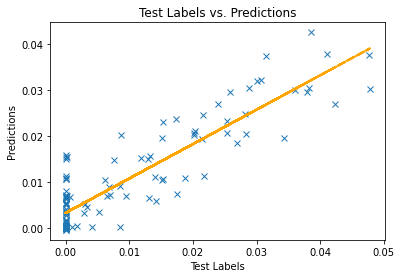

In [70]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
# print(y_test.tolist())
# print(y_pred_list)
# print(testing_features)

plt.plot(testing_target, results, 'x')
a, b = np.polyfit(testing_target, results, 1)
plt.plot(testing_target, a*(testing_target)+b, color='orange', linestyle='--', linewidth=2)
slope, intercept, r_value, p_value, std_err = stats.linregress(testing_target, results)
print("Slope:", slope)
print("Intercept:", intercept)
print("R-Squared:", r_value**2)
print("P-Value:", p_value)
print("Standard Error:", std_err)
plt.xlabel('Test Labels')
plt.ylabel('Predictions')
plt.title('Test Labels vs. Predictions')
plt.show()